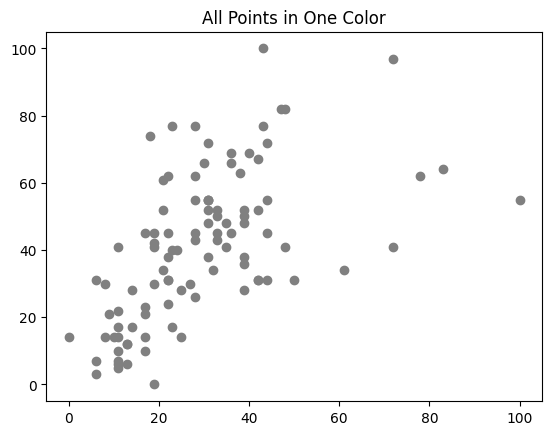

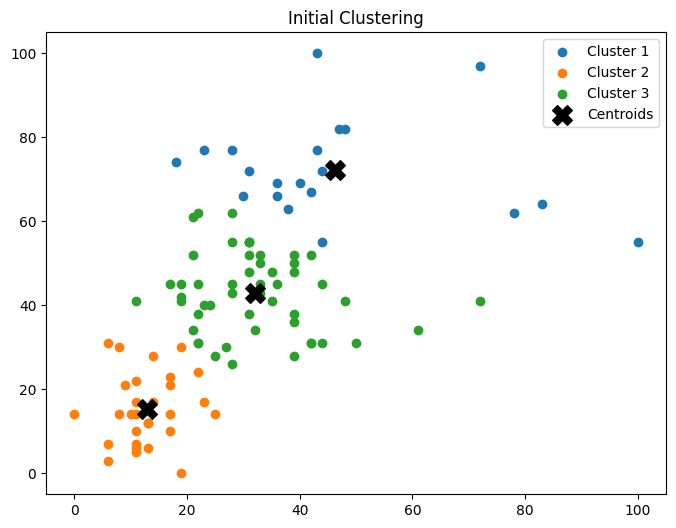

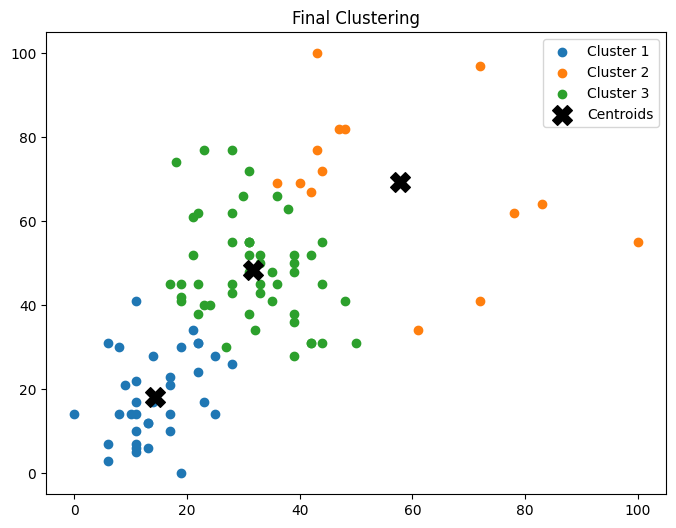

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/homework-2-dataset/cs455_homework1_report_KhadkaDilleGulley.csv',usecols = [3,4])

def min_max_normalization(column):
    return (column - column.min()) / (column.max() - column.min())

df['hp'] = round(min_max_normalization(df['hp'])*100)
df['attack'] = round(min_max_normalization(df['attack'])*100)
df.head(20)

df = df.sample(n=100, random_state=42).reset_index(drop=True)

k = 3
centroids = df.sample(n=k, random_state=42).values

def k_means_clustering(data, centroids, max_iter=100):
    for _ in range(max_iter):
        distances = cdist(data, centroids, metric='cityblock')
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

def compute_sse(data, labels, centroids):
    return sum(((data[labels == i] - centroids[i]) ** 2).sum() for i in range(k))

labels, centroids = k_means_clustering(df.values, centroids)
initial_sse = compute_sse(df.values, labels, centroids)

def plot_clusters(data, labels, centroids, title):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.legend()
    plt.savefig(f'{title}.png')
    plt.show()
    
plt.scatter(df.values[:, 0], df.values[:, 1], color='gray')
plt.title('All Points in One Color')
plt.savefig('all_points.png')
plt.show()
plot_clusters(df.values, labels, centroids, 'Initial Clustering')

centroids = df.sample(n=k, random_state=99).values
final_labels, final_centroids = k_means_clustering(df.values, centroids)
final_sse = compute_sse(df.values, final_labels, final_centroids)
plot_clusters(df.values, final_labels, final_centroids, 'Final Clustering')

with open('cs455_homework_3_report_DilleGulley.txt', 'w') as f:
    f.write(f'Initial SSE: {initial_sse}\n')
    f.write(f'Final SSE: {final_sse}\n')
